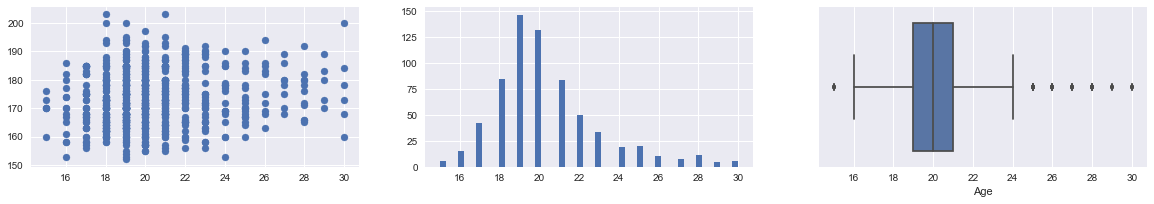

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 674 / 674
[t-SNE] Mean sigma: 3.917764
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.594797
[t-SNE] Error after 175 iterations: 0.594797


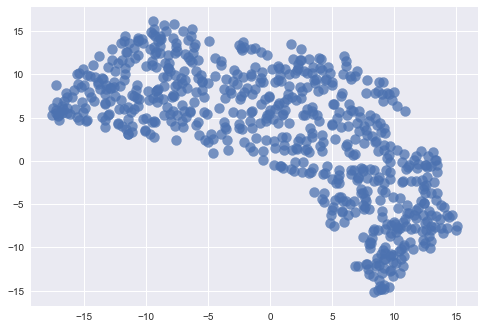

In [4]:
import pandas
dataset = pandas.read_csv('/Users/chenzy/Documents/spring quarter/tim245/hw3/survey_dataset.csv', sep=',')
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)
music = dataset.iloc[:, 0:19]
movies = dataset.iloc[:, 19:31]
hobbies = dataset.iloc[:, 31:63]
phobias = dataset.iloc[:, 63:73]
health = dataset.iloc[:, 73:76]
personality = dataset.iloc[:, 76:133]
spending = dataset.iloc[:, 133:140]
demographics = dataset.iloc[:, 140:150]
selected_category = movies
dataset = pandas.concat([selected_category, demographics], axis=1)
dataset = pandas.get_dummies(dataset)
dataset.head(10)

import seaborn as sns
import matplotlib.pyplot as plt

dataset.describe()

plt.figure(figsize=(20, 10))
#subplot syntax is rows, total number of plots, current plot index
plt.subplot(3,3,1)
plt.scatter(dataset['Age'], dataset['Height'])
plt.subplot(3,3,2)
plt.hist(dataset['Age'],bins=50)
plt.subplot(3,3,3)
sns.boxplot(dataset['Age'])
plt.show()

from sklearn.manifold import TSNE

#create the TSNE representation
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500)
dataset_tsne = tsne.fit_transform(dataset)

#get the values for the two dimensional representation (x,y) for each instance in the dataset
tsne_x =  dataset_tsne [:,0]
tsne_y = dataset_tsne [:,1]

#plot the data
scatter = plt.scatter(tsne_x, tsne_y, alpha = .75,s = 100)
plt.show()

from sklearn import cluster
from matplotlib import pyplot
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn import metrics


In [5]:
plt.rcParams['image.cmap'] = 'jet'

#k is the number of clusters and epsilon is radius in db-scan
k = 5
epsilon = 5
distance_metric = 'euclidean'

#create the clustering models
kmeans = cluster.KMeans(n_clusters=k)
dbscan = cluster.DBSCAN(eps= epsilon)
hierarchical = cluster.AgglomerativeClustering(n_clusters=k, affinity=distance_metric, linkage='ward')
gaussian_mm = mixture.GaussianMixture(n_components=k)

#fit the models to the dataset
kmeans.fit(dataset)
dbscan.fit(dataset)
hierarchical.fit(dataset)
gaussian_mm.fit(dataset)

#get the cluster labels for each instance
kmeans_labels = kmeans.labels_
dbscan_labels = dbscan.labels_
hierarchical_labels = hierarchical.labels_
gaussian_mm_labels = gaussian_mm.predict(dataset)

#compute the silhouette score for each clustering
kmeans_silhouette_score = metrics.silhouette_score(dataset, kmeans_labels, metric=distance_metric)

#must have more than 1 cluster to compute the silhouette_score for dbscan
noise_index = np.argwhere(dbscan_labels==-1)
if(np.unique(np.delete(dbscan_labels,noise_index)).size > 1):
    dbscan_silhouette_score = metrics.silhouette_score(dataset, dbscan_labels, metric=distance_metric)
else:
    dbscan_silhouette_score = None
    
hierarchical_silhouette_score = metrics.silhouette_score(dataset, hierarchical_labels, metric=distance_metric)
gaussian_mm_silhouette_score = metrics.silhouette_score(dataset, gaussian_mm_labels, metric=distance_metric)


#plot the results using the T-SNE representation
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.scatter(tsne_x, tsne_y, c= kmeans_labels)
plt.title('K Means'  + "\n" + 'Silhouette Score: ' + str(kmeans_silhouette_score))
plt.subplot(2,2,2)
plt.scatter(tsne_x, tsne_y, c= dbscan_labels)

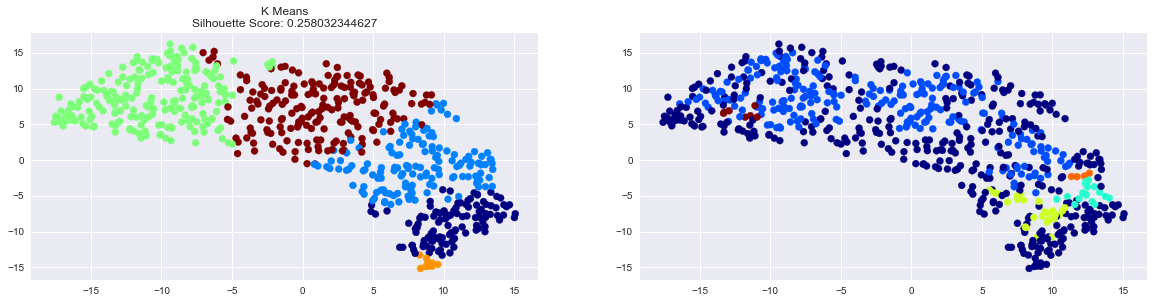

In [6]:
plt.show()

In [7]:
#scores for the parameters
kmeans_silhouette_scores = []
dbscan_silhouette_scores = []
hierarchical_silhouette_scores = []
gaussian_mm_silhouette_scores = []

distance_metric = 'euclidean'

#loop through different values for k and compute the silhouette score
for k in range(2,50,1):
    kmeans = cluster.KMeans(n_clusters=k)
    hierarchical = cluster.AgglomerativeClustering(n_clusters=k, affinity=distance_metric, linkage='ward')
    gaussian_mm = mixture.GaussianMixture(n_components=k)

    kmeans.fit(dataset)
    hierarchical.fit(dataset)
    gaussian_mm.fit(dataset)

    kmeans_labels = kmeans.labels_
    hierarchical_labels = hierarchical.labels_
    gaussian_mm_labels = gaussian_mm.predict(dataset)

    kmeans_silhouette_score = metrics.silhouette_score(dataset, kmeans_labels, metric=distance_metric)
    hierarchical_silhouette_score = metrics.silhouette_score(dataset, hierarchical_labels, metric=distance_metric)
    gaussian_mm_silhouette_score = metrics.silhouette_score(dataset, gaussian_mm_labels, metric=distance_metric)
    
    kmeans_silhouette_scores.append(kmeans_silhouette_score)
    gaussian_mm_silhouette_scores.append(gaussian_mm_silhouette_score)
    hierarchical_silhouette_scores.append(hierarchical_silhouette_score)
    
#loop through different values for epsilon and compute the silhouette score
for epsilon in range(2,50,1):
    dbscan = cluster.DBSCAN(eps=epsilon)
    dbscan.fit(dataset)
    dbscan_labels = dbscan.labels_
    #must have more than 1 cluster to compute the silhouette_score
    noise_index = np.argwhere(dbscan_labels==-1)
    if(np.unique(np.delete(dbscan_labels,noise_index)).size > 1):
        dbscan_silhouette_score = metrics.silhouette_score(dataset, dbscan_labels, metric=distance_metric)
    else:
        dbscan_silhouette_score = None
    dbscan_silhouette_scores.append(dbscan_silhouette_score)
    
#plot silhouette score as function of k and epsilon
plt.figure(figsize=(20, 10))
plt.subplot(2,4,1)
plt.plot(range(2,50,1),kmeans_silhouette_scores)
plt.title('K-Means')
plt.subplot(2,4,2)
plt.plot(range(2,50,1),dbscan_silhouette_scores)
plt.title('DB-Scan Clustering')
plt.subplot(2,4,3)
plt.plot(range(2,50,1),hierarchical_silhouette_scores)
plt.title('Hierarchical Clustering')

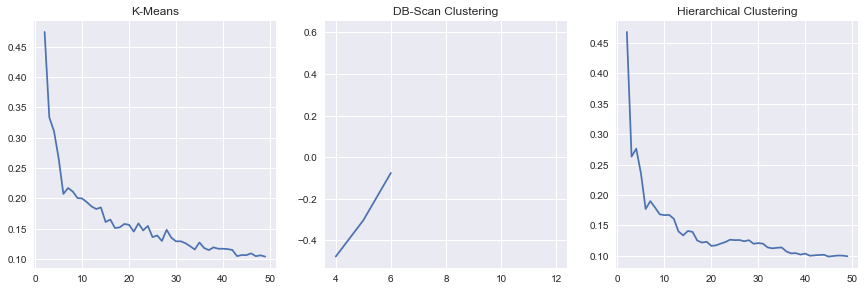

In [8]:
plt.show()

In [9]:
#k is the number of clusters and epsilon is radius in db-scan
k = 5
epsilon = 5
distance_metric = 'euclidean'

#create the clustering models
kmeans = cluster.KMeans(n_clusters=k)
dbscan = cluster.DBSCAN(eps= epsilon)
hierarchical = cluster.AgglomerativeClustering(n_clusters=k, affinity=distance_metric, linkage='ward')
gaussian_mm = mixture.GaussianMixture(n_components=k)

#fit the models to the dataset
kmeans.fit(dataset)
dbscan.fit(dataset)
hierarchical.fit(dataset)
gaussian_mm.fit(dataset)

#get the cluster labels for each instance
kmeans_labels = kmeans.labels_
dbscan_labels = dbscan.labels_
hierarchical_labels = hierarchical.labels_
gaussian_mm_labels = gaussian_mm.predict(dataset)
#get the labels from the selected algorithm, e.g. kmeans
selected_labels = kmeans_labels

#add the labels to the dataset
labeled_dataset = dataset
labeled_dataset['cluster_label'] = pandas.Series(selected_labels)

NameError: name 'kmean_labels' is not defined

In [10]:
#k is the number of clusters and epsilon is radius in db-scan
k = 5
epsilon = 5
distance_metric = 'euclidean'

#create the clustering models
kmeans = cluster.KMeans(n_clusters=k)
dbscan = cluster.DBSCAN(eps= epsilon)
hierarchical = cluster.AgglomerativeClustering(n_clusters=k, affinity=distance_metric, linkage='ward')
gaussian_mm = mixture.GaussianMixture(n_components=k)

#fit the models to the dataset
kmeans.fit(dataset)
dbscan.fit(dataset)
hierarchical.fit(dataset)
gaussian_mm.fit(dataset)

#get the cluster labels for each instance
kmeans_labels = kmeans.labels_
dbscan_labels = dbscan.labels_
hierarchical_labels = hierarchical.labels_
gaussian_mm_labels = gaussian_mm.predict(dataset)
#get the labels from the selected algorithm, e.g. kmeans
selected_labels = kmeans_labels

#add the labels to the dataset
labeled_dataset = dataset
labeled_dataset['cluster_label'] = pandas.Series(selected_labels)

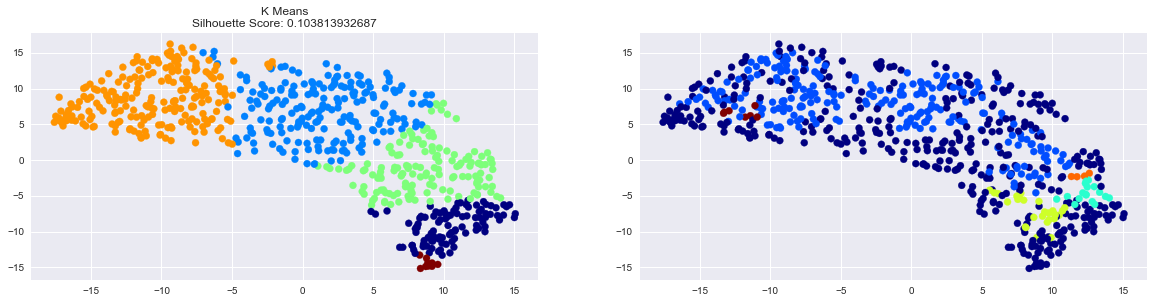

In [11]:
#plot the results using the T-SNE representation
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.scatter(tsne_x, tsne_y, c= kmeans_labels)
plt.title('K Means'  + "\n" + 'Silhouette Score: ' + str(kmeans_silhouette_score))
plt.subplot(2,2,2)
plt.scatter(tsne_x, tsne_y, c= dbscan_labels)
plt.show()

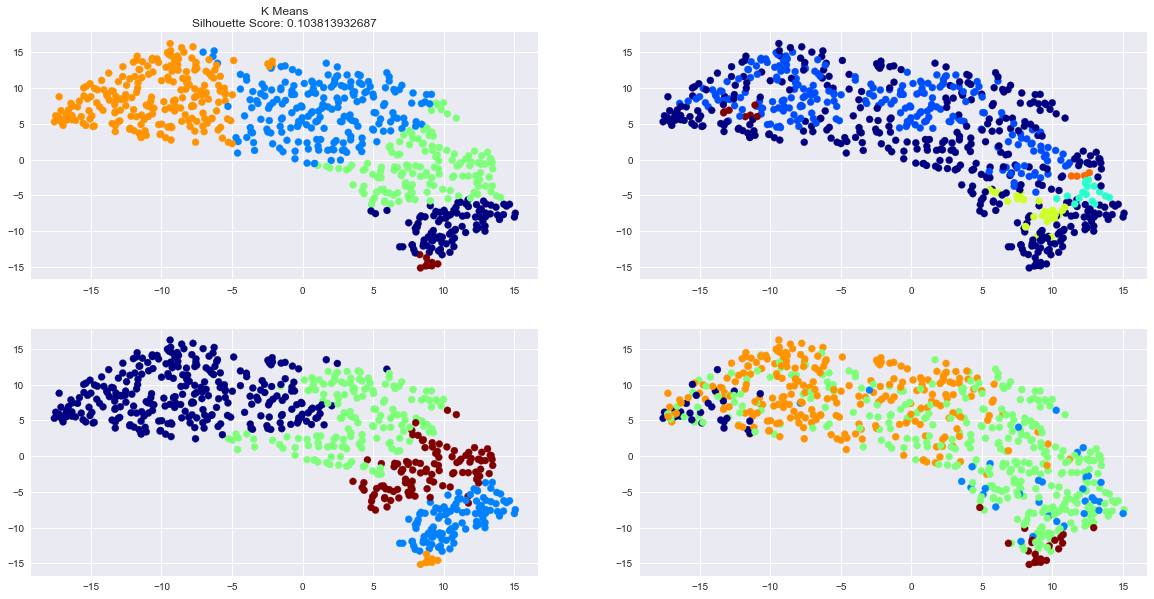

In [12]:
#plot the results using the T-SNE representation
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.scatter(tsne_x, tsne_y, c= kmeans_labels)
plt.title('K Means'  + "\n" + 'Silhouette Score: ' + str(kmeans_silhouette_score))
plt.subplot(2,2,2)
plt.scatter(tsne_x, tsne_y, c= dbscan_labels)
plt.subplot(2,2,3)
plt.scatter(tsne_x, tsne_y, c= hierarchical_labels)
plt.subplot(2,2,4)
plt.scatter(tsne_x, tsne_y, c= gaussian_mm_labels)
plt.show()

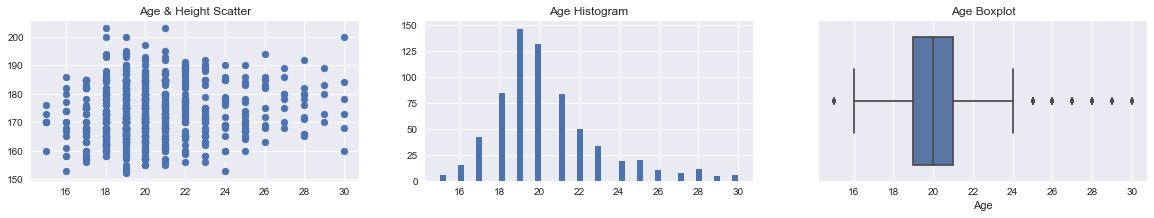

In [13]:
plt.figure(figsize=(20, 10))
#subplot syntax is rows, total number of plots, current plot index
plt.subplot(3,3,1)
plt.scatter(dataset['Age'], dataset['Height'])
plt.title('Age & Height Scatter')
plt.subplot(3,3,2)
plt.hist(dataset['Age'],bins=50)
plt.title('Age Histogram')
plt.subplot(3,3,3)
sns.boxplot(dataset['Age'])
plt.title('Age Boxplot')
plt.show()

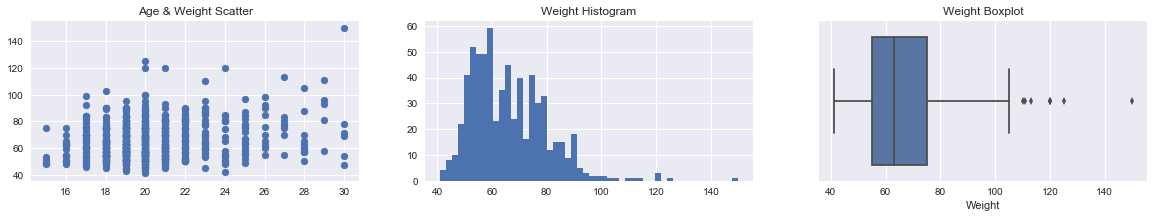

In [14]:
plt.figure(figsize=(20, 10))
#subplot syntax is rows, total number of plots, current plot index
plt.subplot(3,3,1)
plt.scatter(dataset['Age'], dataset['Weight'])
plt.title('Age & Weight Scatter')
plt.subplot(3,3,2)
plt.hist(dataset['Weight'],bins=50)
plt.title('Weight Histogram')
plt.subplot(3,3,3)
sns.boxplot(dataset['Weight'])
plt.title('Weight Boxplot')
plt.show()

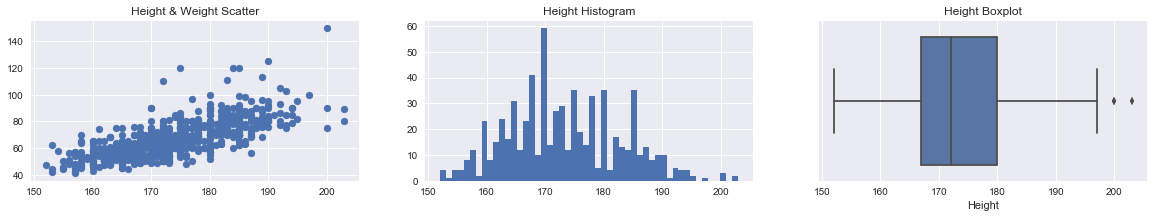

In [15]:
plt.figure(figsize=(20, 10))
#subplot syntax is rows, total number of plots, current plot index
plt.subplot(3,3,1)
plt.scatter(dataset['Height'], dataset['Weight'])
plt.title('Height & Weight Scatter')
plt.subplot(3,3,2)
plt.hist(dataset['Height'],bins=50)
plt.title('Height Histogram')
plt.subplot(3,3,3)
sns.boxplot(dataset['Height'])
plt.title('Height Boxplot')
plt.show()

In [16]:
dataset.head(3)

,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,...,Education_masters degree,Education_primary school,Education_secondary school,Only child_no,Only child_yes,Village - town_city,Village - town_village,House - block of flats_block of flats,House - block of flats_house/bungalow,cluster_label
0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,...,0,0,0,1,0,0,1,1,0,3
1,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,...,0,0,0,1,0,1,0,1,0,3
2,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,...,0,0,1,1,0,1,0,1,0,1


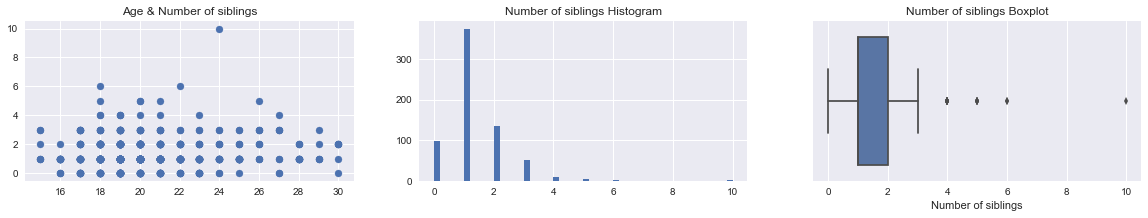

In [22]:
plt.figure(figsize=(20, 10))
#subplot syntax is rows, total number of plots, current plot index
plt.subplot(3,3,1)
plt.scatter(dataset['Age'], dataset['Number of siblings'])
plt.title('Age & Number of siblings')
plt.subplot(3,3,2)
plt.hist(dataset['Number of siblings'],bins=50)
plt.title('Number of siblings Histogram')
plt.subplot(3,3,3)
sns.boxplot(dataset['Number of siblings'])
plt.title('Number of siblings Boxplot')
plt.show()